
G_t table by age:
 age  avg_log_income          G_t
  25        9.168372  9588.999868
  26        9.192967  9827.771315
  27        9.283569 10759.763808
  28        9.149213  9407.035797
  29        9.463988 12887.171287
  30        9.383221 11887.247706
  31        9.337927 11360.830429
  32        9.249322 10397.509129
  33        9.350844 11508.532255
  34        9.491744 13249.880195
  35        9.351376 11514.655406
  36        9.415333 12275.161834
  37        9.179951  9700.679311
  38        9.274986 10667.806674
  39        9.476062 13043.724312
  40        9.381907 11871.626641
  41        9.488834 13211.381324
  42        9.635932 15304.960359
  43        9.552064 14073.710154
  44        9.489789 13224.004292
  45        9.573289 14375.615273
  46        9.644391 15434.964906
  47        9.685029 16075.138732
  48        9.637101 15322.858457
  49        9.848591 18931.659117
  50        9.704012 16383.201406
  51        9.751153 17174.017338
  52        9.667590 15797.23

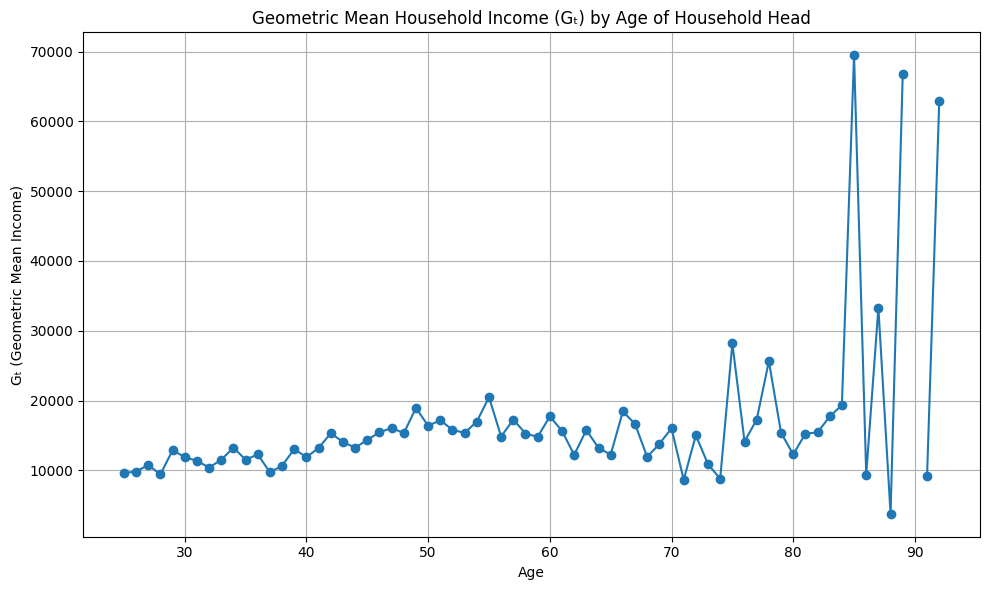

In [1]:
import pandas as pd
import numpy as np

# Load the processed output dataset
final_df = pd.read_csv("final_output.csv")

# Replace zero or missing income values to safely compute logarithms
final_df['total_household_income'] = final_df['total_household_income'].replace(0, np.nan)

# Compute log of total household income
final_df['log_income'] = np.log(final_df['total_household_income'])

# Group by age of household head (m1ac5) and compute the average log income
# Since the dataset only contains household heads, one row per household
gt_df = final_df.groupby('m1ac5')['log_income'].mean().reset_index()
gt_df.columns = ['age', 'avg_log_income']

# Exponentiate average log income to get G_t
gt_df['G_t'] = np.exp(gt_df['avg_log_income'])

# Save the resulting G_t values to a CSV file
gt_df.to_csv("G_t_new.csv")

# Print entire G_t table to the terminal
print("\nG_t table by age:")
print(gt_df.to_string(index=False))
print("\n✅ G_t table saved to 'gt_by_age.csv'")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(gt_df['age'], gt_df['G_t'], marker='o', linestyle='-')
plt.title('Geometric Mean Household Income (Gₜ) by Age of Household Head')
plt.xlabel('Age')
plt.ylabel('Gₜ (Geometric Mean Income)')
plt.grid(True)
plt.tight_layout()
plt.savefig("gt_by_age_plot.png")
plt.show()
